/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+02, tolerance: 4.698e-01
  model = cd_fast.enet_coordinate_descent(


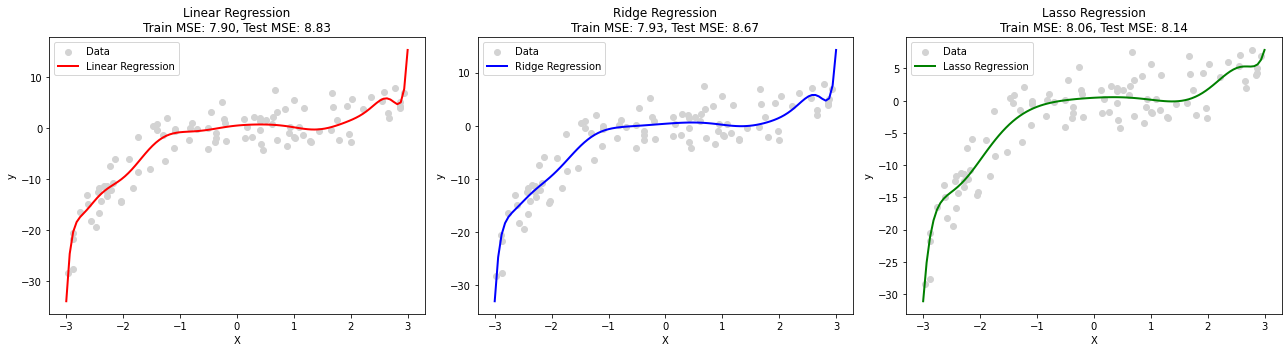

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate noisy cubic data
np.random.seed(0)
X = np.sort(6 * np.random.rand(100, 1) - 3, axis=0)
y = 0.5 * X**3 - X**2 + X + np.random.randn(100, 1) * 3

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Polynomial degree
degree = 15

# Regression models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000)
}

# Setup for plotting
plt.figure(figsize=(18, 5))
colors = ['red', 'blue', 'green']
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# Train and visualize each model
for i, (name, model) in enumerate(models.items()):
    pipeline = make_pipeline(PolynomialFeatures(degree), model)
    pipeline.fit(X_train, y_train.ravel())
    y_pred = pipeline.predict(x_plot)

    # MSE scores
    train_mse = mean_squared_error(y_train, pipeline.predict(X_train))
    test_mse = mean_squared_error(y_test, pipeline.predict(X_test))

    # Plotting
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, facecolor='lightgray', label='Data')
    plt.plot(x_plot, y_pred, color=colors[i], linewidth=2, label=f'{name}')
    plt.title(f"{name}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()
